In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

data_frame = pd.read_excel("./dds/rollingsales_brooklyn.xlsx", skiprows=4)
data_frame

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,NaN,A5,30 BAY 10,NaN,...,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,NaN,A5,36 BAY 10TH STREET,NaN,...,1.0,0.0,1.0,1547.0,1428.0,1930.0,1,A5,0,2022-03-18
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,NaN,A9,8645 16TH AVENUE,NaN,...,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,48,NaN,A9,12 BAY 13TH ST,NaN,...,1.0,0.0,1.0,3142.0,3200.0,1999.0,1,A9,0,2022-03-14
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,62,NaN,A9,44 BAY 13TH STREET,NaN,...,1.0,0.0,1.0,3575.0,2104.0,1901.0,1,A9,990000,2022-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28073,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3290,12,NaN,F5,366 HARMAN STREET,NaN,...,0.0,1.0,1.0,2749.0,1340.0,1931.0,4,F5,1250000,2022-09-21
28074,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3176,15,NaN,E1,370 JEFFERSON STREET,NaN,...,0.0,1.0,1.0,15000.0,21000.0,1931.0,4,E1,0,2022-03-24
28075,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3248,53,NaN,Z9,299 STOCKHOLM STREET,NaN,...,0.0,1.0,1.0,2499.0,155.0,1931.0,4,Z9,495000,2022-08-15
28076,3,WYCKOFF HEIGHTS,44 CONDO PARKING,4,3280,1133,NaN,RP,"369 HARMAN STREET, P3",P3,...,NaN,1.0,1.0,NaN,NaN,2009.0,4,RP,0,2022-04-26


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28078 entries, 0 to 28077
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         28078 non-null  int64         
 1   NEIGHBORHOOD                    28078 non-null  object        
 2   BUILDING CLASS CATEGORY         28078 non-null  object        
 3   TAX CLASS AT PRESENT            27999 non-null  object        
 4   BLOCK                           28078 non-null  int64         
 5   LOT                             28078 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       27999 non-null  object        
 8   ADDRESS                         28078 non-null  object        
 9   APARTMENT NUMBER                8103 non-null   object        
 10  ZIP CODE                        28074 non-null  float64       
 11  RE

In [7]:
data_frame.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [8]:
data_frame.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 79
BLOCK                                 0
LOT                                   0
EASEMENT                          28078
BUILDING CLASS AT PRESENT            79
ADDRESS                               0
APARTMENT NUMBER                  19975
ZIP CODE                              4
RESIDENTIAL UNITS                  4688
COMMERCIAL UNITS                  10146
TOTAL UNITS                        3396
LAND SQUARE FEET                  11438
GROSS SQUARE FEET                 11438
YEAR BUILT                         2147
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [16]:
data_frame["EASEMENT"].sum()

data_formated = data_frame.drop(data_frame.loc[data_frame["SALE PRICE"] == 0].index)
data_formated.drop(["EASEMENT"], axis=1, inplace=True)
data_formated

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10,NaN,11228.0,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,A9,8645 16TH AVENUE,NaN,11214.0,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,62,A9,44 BAY 13TH STREET,NaN,11214.0,1.0,0.0,1.0,3575.0,2104.0,1901.0,1,A9,990000,2022-10-18
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,A9,8645 BAY 16 STREE,NaN,11214.0,1.0,0.0,1.0,1571.0,1456.0,1935.0,1,A9,925000,2021-11-03
11,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6379,42,S1,2142 86TH STREET,NaN,11214.0,1.0,1.0,2.0,1600.0,2640.0,1925.0,1,S1,2430000,2022-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28068,3,WYCKOFF HEIGHTS,22 STORE BUILDINGS,4,3354,29,K1,452 WYCKOFF AVENUE,NaN,11237.0,0.0,3.0,3.0,27750.0,8838.0,1931.0,4,K1,4025000,2022-03-25
28069,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,15,F4,444 JEFFERSON STREET,NaN,11237.0,0.0,1.0,1.0,10000.0,9000.0,1960.0,4,F4,6500000,2022-02-22
28070,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,25,F4,427 TROUTMAN STREET,NaN,11237.0,0.0,1.0,1.0,9250.0,6900.0,1931.0,4,F4,6500000,2022-02-22
28073,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3290,12,F5,366 HARMAN STREET,NaN,11237.0,0.0,1.0,1.0,2749.0,1340.0,1931.0,4,F5,1250000,2022-09-21


In [18]:
def int_identify(number):
    if type(number) == type(1):
        return number
    return 1

def year_identify(year, mean):
    if year == 0:
        return mean
    return year

data_formated["TAX CLASS AT TIME OF SALE"] = data_formated["TAX CLASS AT TIME OF SALE"].apply(lambda x: int_identify(x))
mean_year = data_formated["YEAR BUILT"].mean()
data_formated["YEAR BUILT"] = data_formated["YEAR BUILT"].apply(lambda x: year_identify(x, mean_year))
data_formated

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,56,A5,30 BAY 10,NaN,11228.0,1.0,0.0,1.0,1546.0,1428.0,1930.0,1,A5,75000,2022-06-01
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,22,A9,8645 16TH AVENUE,NaN,11214.0,1.0,0.0,1.0,2058.0,1492.0,1930.0,1,A9,875000,2022-01-07
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6363,62,A9,44 BAY 13TH STREET,NaN,11214.0,1.0,0.0,1.0,3575.0,2104.0,1901.0,1,A9,990000,2022-10-18
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,24,A9,8645 BAY 16 STREE,NaN,11214.0,1.0,0.0,1.0,1571.0,1456.0,1935.0,1,A9,925000,2021-11-03
11,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6379,42,S1,2142 86TH STREET,NaN,11214.0,1.0,1.0,2.0,1600.0,2640.0,1925.0,1,S1,2430000,2022-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28068,3,WYCKOFF HEIGHTS,22 STORE BUILDINGS,4,3354,29,K1,452 WYCKOFF AVENUE,NaN,11237.0,0.0,3.0,3.0,27750.0,8838.0,1931.0,4,K1,4025000,2022-03-25
28069,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,15,F4,444 JEFFERSON STREET,NaN,11237.0,0.0,1.0,1.0,10000.0,9000.0,1960.0,4,F4,6500000,2022-02-22
28070,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3177,25,F4,427 TROUTMAN STREET,NaN,11237.0,0.0,1.0,1.0,9250.0,6900.0,1931.0,4,F4,6500000,2022-02-22
28073,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3290,12,F5,366 HARMAN STREET,NaN,11237.0,0.0,1.0,1.0,2749.0,1340.0,1931.0,4,F5,1250000,2022-09-21


<AxesSubplot: xlabel='YEAR BUILT', ylabel='median of price\n(1 : 10000000)'>

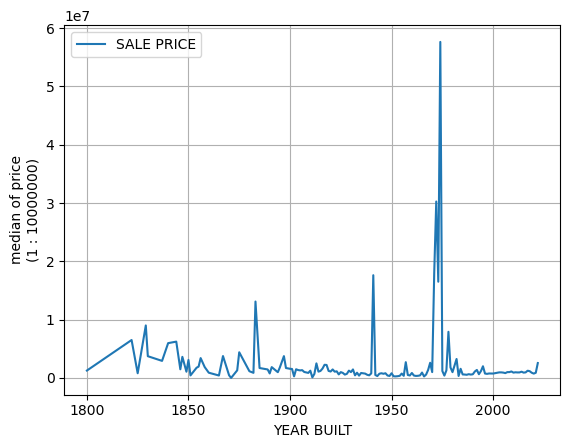

In [22]:
grouped_data = data_formated.groupby("YEAR BUILT")[["SALE PRICE"]].median()
grouped_data.plot(xlabel="YEAR BUILT", ylabel="median of price\n(1 : 10000000)", grid = "true")

<AxesSubplot: xlabel='SALE DATE,SALE DATE'>

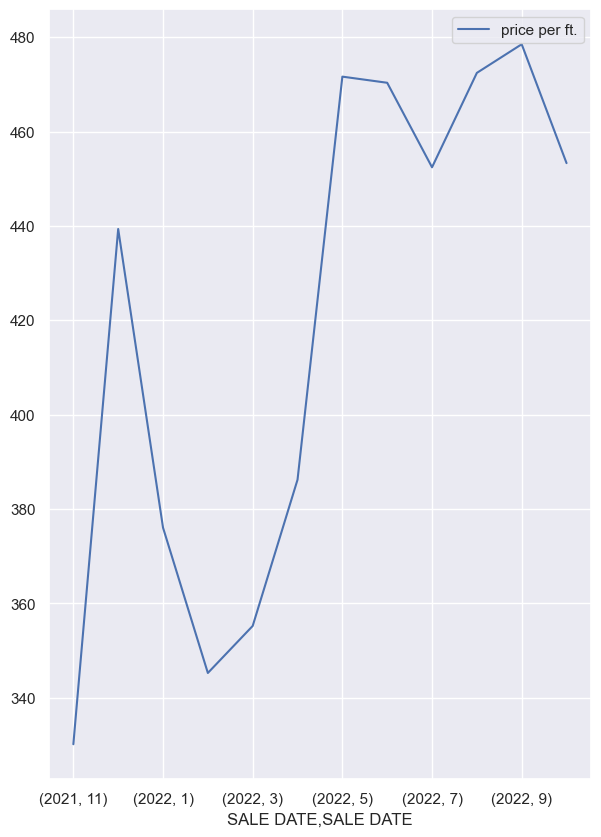

In [36]:
formated_data = data_frame[(data_frame['TOTAL UNITS'] > 0) & (data_frame['LAND SQUARE FEET'] > 0)]
formated_data = formated_data.dropna(axis='columns')
formated_data["price per ft."] = formated_data["SALE PRICE"]/formated_data['LAND SQUARE FEET']
formated_data.groupby([formated_data["SALE DATE"].dt.year, formated_data["SALE DATE"].dt.month])[["price per ft."]].mean().plot(kind="line")

<AxesSubplot: xlabel='date', ylabel='sum sale\n(1 : 100000000)'>

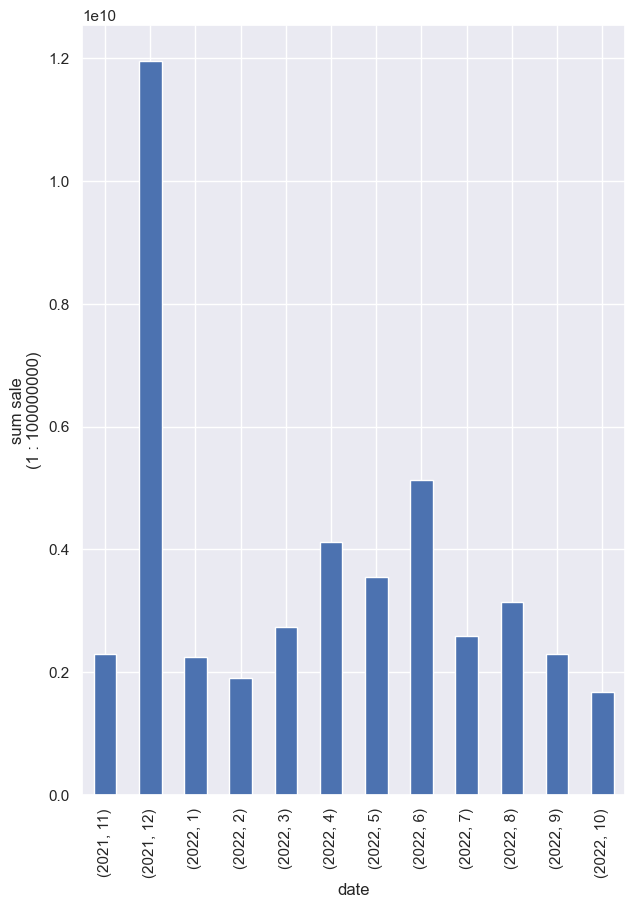

In [32]:
grouped_data = data_formated.groupby([data_formated["SALE DATE"].dt.year, data_formated["SALE DATE"].dt.month])[["SALE PRICE"]].sum()
grouped_data.plot(kind = "bar", xlabel="date", ylabel="sum sale\n(1 : 100000000)", legend = "")

<AxesSubplot: xlabel='Building class category', ylabel='Mean of price\n(1:1000000)'>

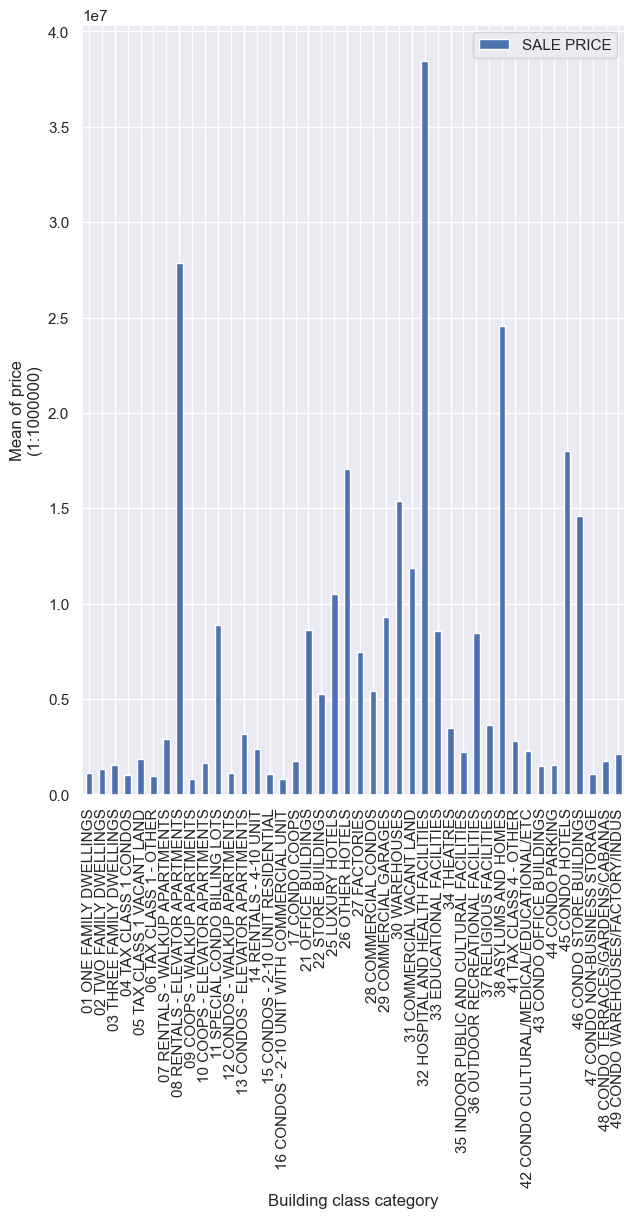

In [33]:
grouped_data = data_formated.groupby("BUILDING CLASS CATEGORY")[["SALE PRICE"]].mean()
grouped_data.plot(kind = "bar", xlabel="Building class category", ylabel="Mean of price\n(1:1000000)")

<AxesSubplot: xlabel='SALE DATE,SALE DATE'>

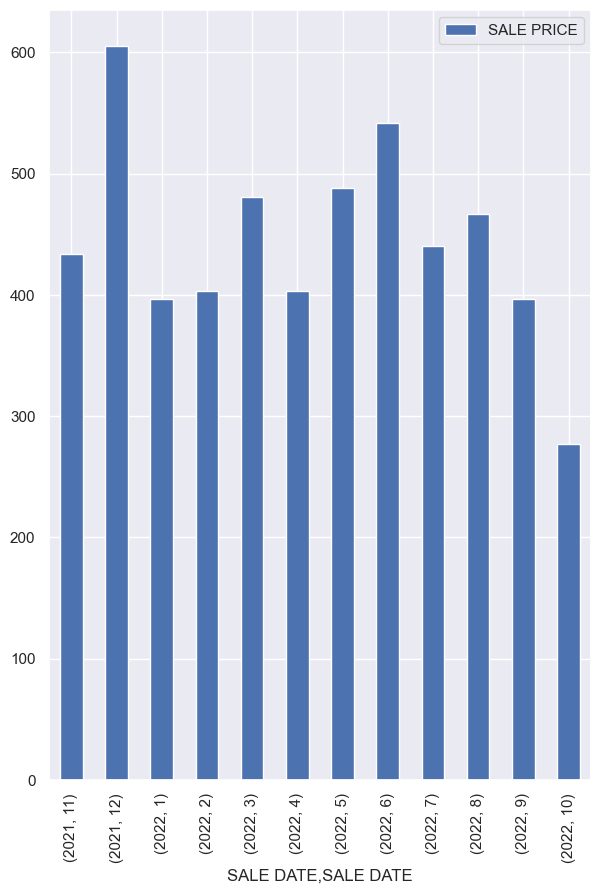

In [39]:
formated_data[formated_data["SALE PRICE"] > 1000000].groupby([formated_data["SALE DATE"].dt.year, formated_data["SALE DATE"].dt.month])[["SALE PRICE"]].count().plot(kind="bar")

[Text(0.5, 1.0, 'Sales per Neighborhood')]

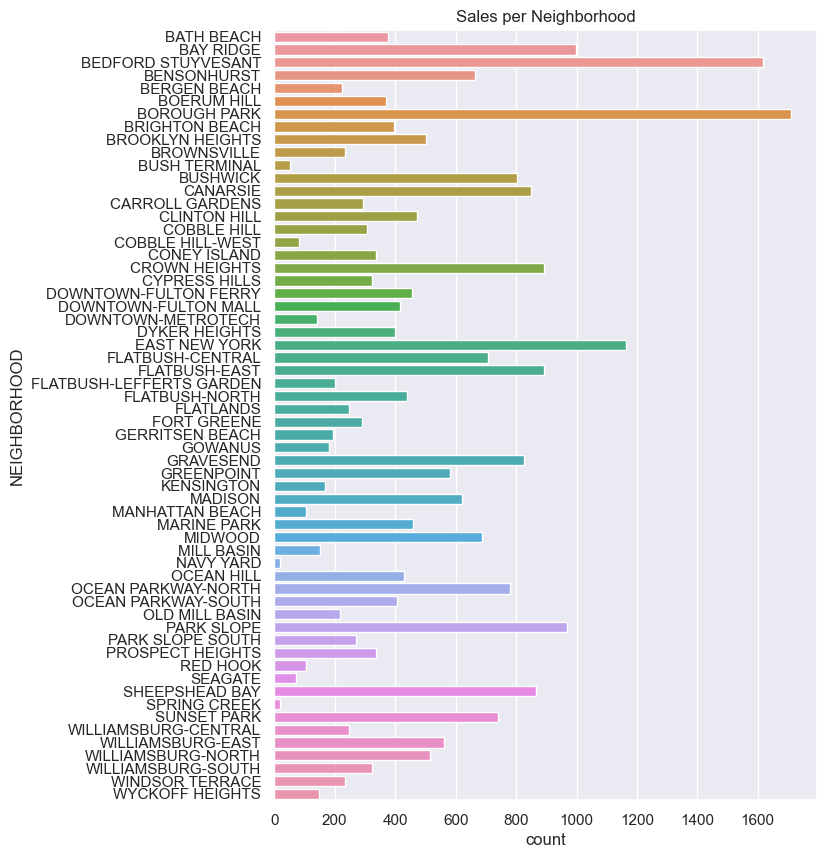

In [23]:
sns.set(rc={"figure.figsize": (7, 10)})
sns.countplot(data=data_frame, y="NEIGHBORHOOD").set(
    title="Sales per Neighborhood")

<AxesSubplot: xlabel='NEIGHBORHOOD'>

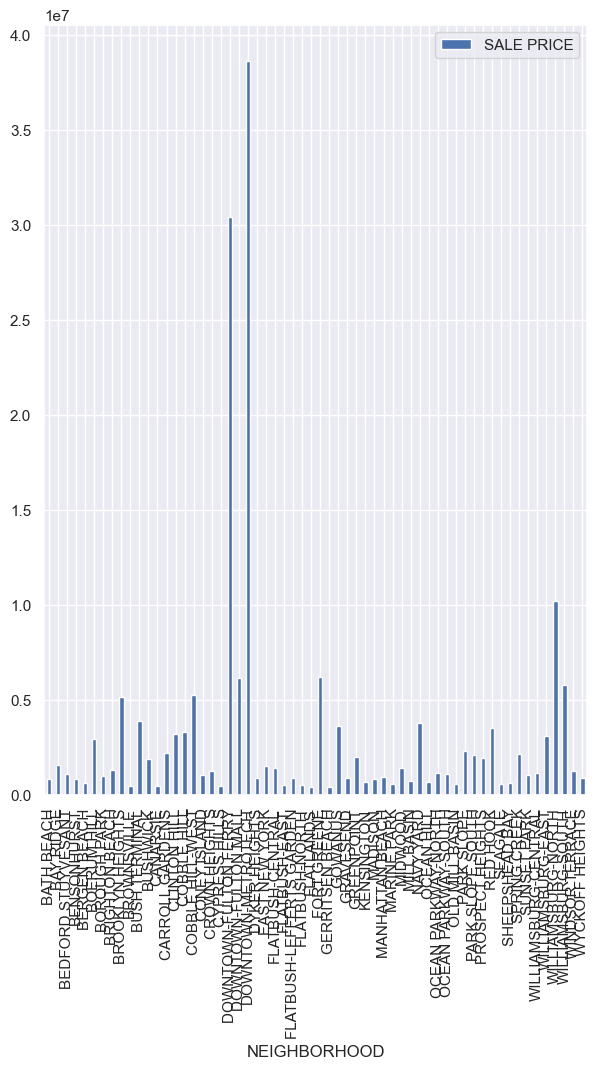

In [37]:
formated_data.groupby([formated_data["NEIGHBORHOOD"]])[["SALE PRICE"]].mean().plot(kind="bar")

C:\Users\User\AppData\Local\Temp\ipykernel_15692\2257539662.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='NEIGHBORHOOD', x='COMMERCIAL UNITS',data=data_frame, ci=None).set(title="Sales of Commercial Units per Neighborhood")


[Text(0.5, 1.0, 'Sales of Commercial Units per Neighborhood')]

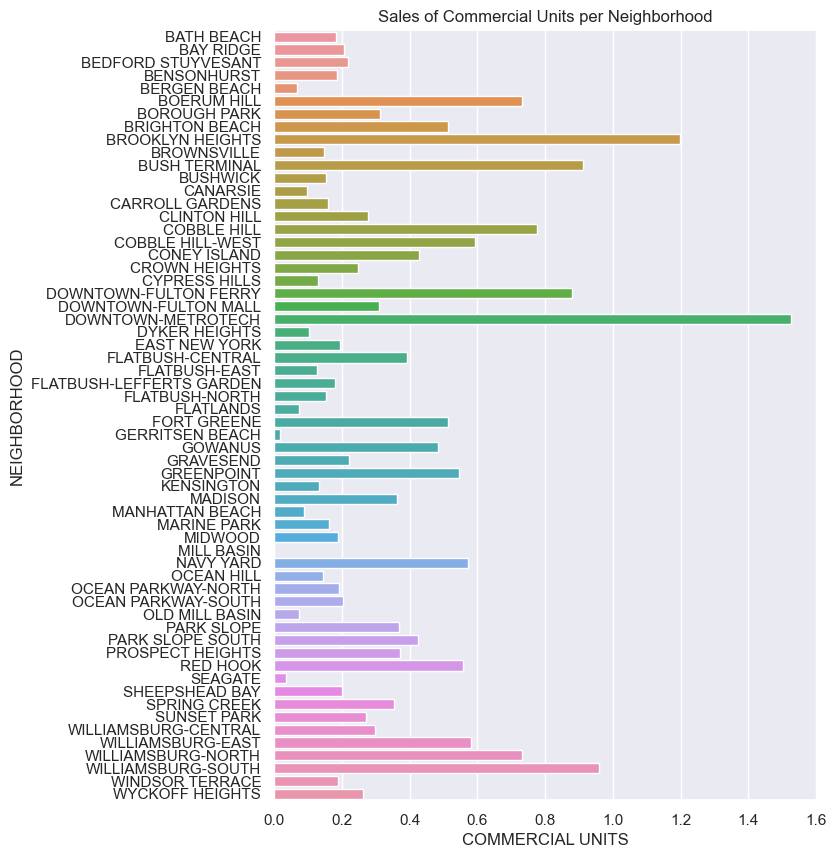

In [25]:
sns.barplot(y='NEIGHBORHOOD', x='COMMERCIAL UNITS',data=data_frame, ci=None).set(title="Sales of Commercial Units per Neighborhood")

C:\Users\User\AppData\Local\Temp\ipykernel_15692\1619475170.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='NEIGHBORHOOD', x='RESIDENTIAL UNITS',data=data_frame, ci=None).set(title="Sales of Residential Units per Neighborhood")


[Text(0.5, 1.0, 'Sales of Residential Units per Neighborhood')]

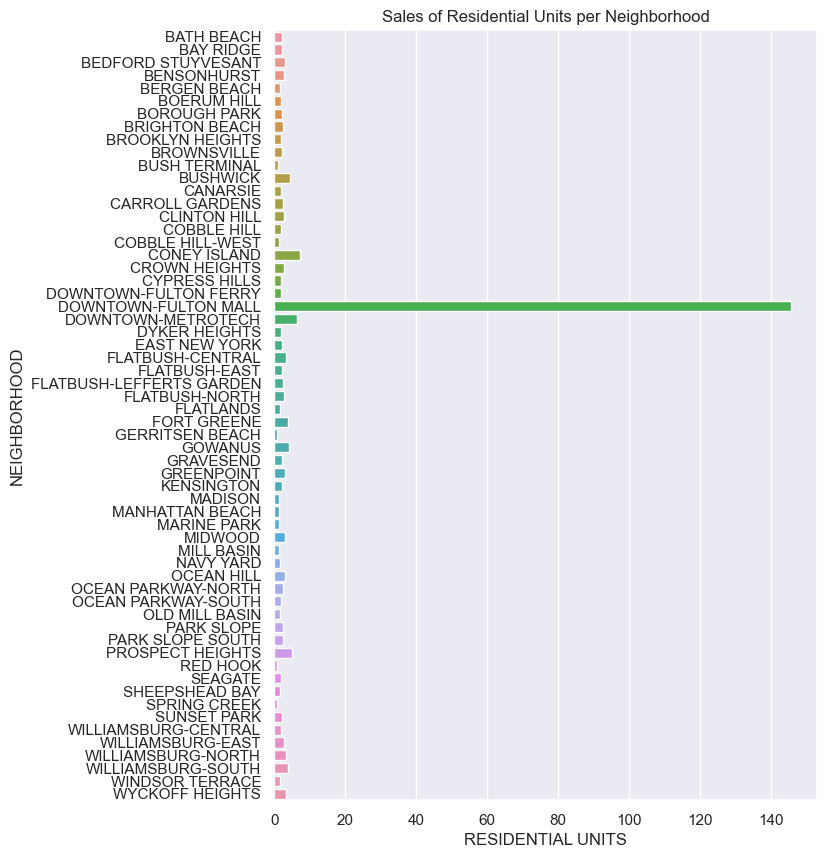

In [26]:
sns.barplot(y='NEIGHBORHOOD', x='RESIDENTIAL UNITS',data=data_frame, ci=None).set(title="Sales of Residential Units per Neighborhood")